In [1]:
import sys
import os
import importlib

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

import files
importlib.reload(files)

import utils
importlib.reload(utils)

from files import *
from utils import *  

In [2]:
occupation_new=pd.read_csv("../data/simulation_data/Occupancy_per_hour_Youssef.txt")
occ=occupation_new.iloc[:, -1]
reshaped = occ.values.reshape(-1, 24)
occupation = pd.DataFrame(reshaped)

In [3]:
conso_tou = pd.read_csv("../data/simulation_data/conso_kmeans_data/clusters_dataavecoccupation_heat_perif_toulouse_kmeans")

In [4]:
"""
Fusion des DataFrames de  Text et occupation  pour la  zone climatique : Toulouse
"""
Text_occ_agen = pd.concat([Text_2_agen,occupation],axis=1).reset_index(drop=True)
Text_occ_albi = pd.concat([Text_2_albi,occupation],axis=1).reset_index(drop=True)
Text_occ_auch = pd.concat([Text_2_auch,occupation],axis=1).reset_index(drop=True)
Text_occ_toulouse = pd.concat([Text_2_toulouse,occupation],axis=1).reset_index(drop=True)
Text_occ_combined_tou = pd.concat([Text_occ_agen, Text_occ_albi,Text_occ_auch,Text_occ_toulouse], axis=0).reset_index(drop=True)



In [5]:
"""
Ajout d'une colonne binaire (pour identifier les jours de consommation)  et d'une colonne cluster pour le  DataFrame
de température à l'extérieur et consommation  de la  zone  climatique : toulouse .
"""
Text_occ_conso_heat_tou=Text_occ_combined_tou.copy()
Text_occ_conso_heat_tou['heat_on'] = conso_tou['heat_on']
Text_occ_conso_heat_tou['clusters'] = conso_tou['clusters']
Text_occ_conso_heat_tou.columns = Text_occ_conso_heat_tou.columns.astype(str)


C:\Users\toubia\AppData\Local\Temp\ipykernel_2724\2700309779.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_balanced = X_balanced.applymap(lambda x: float(str(x).replace(',', '.')))



 Évaluation de Random Forest avec train_test_split...


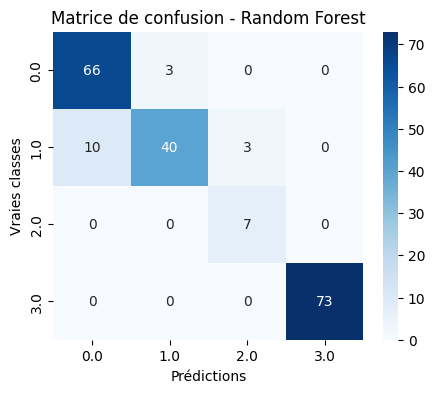

Random Forest - Accuracy: 0.9208 - F1 Score: 0.9195 - Temps d'exécution: 0.3713 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


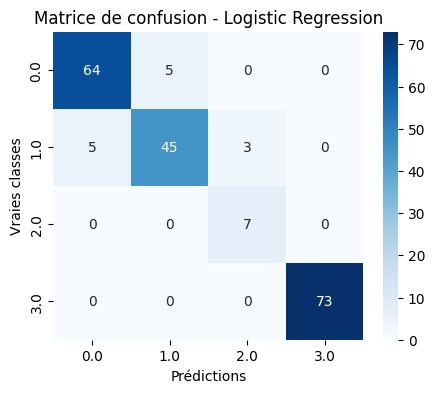

Logistic Regression - Accuracy: 0.9356 - F1 Score: 0.9360 - Temps d'exécution: 0.4649 sec
###################################################################

 Évaluation de SVC avec train_test_split...


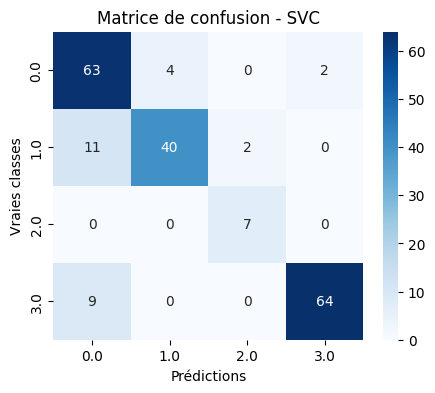

SVC - Accuracy: 0.8614 - F1 Score: 0.8627 - Temps d'exécution: 0.0447 sec
###################################################################

 Évaluation de KNN avec train_test_split...


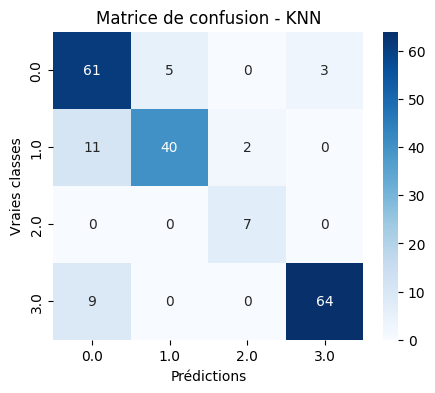

KNN - Accuracy: 0.8515 - F1 Score: 0.8527 - Temps d'exécution: 0.3365 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


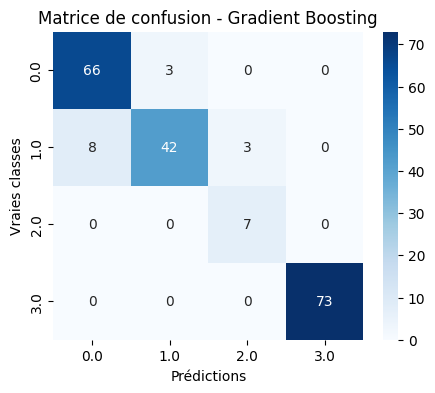

Gradient Boosting - Accuracy: 0.9307 - F1 Score: 0.9301 - Temps d'exécution: 3.1956 sec
###################################################################
****************************************************************************************************
****************************************************************************************************
****************************************************************************************************

 Évaluation de Random Forest avec Cross Validation (4-folds)...


C:\Users\toubia\AppData\Local\Temp\ipykernel_2724\2700309779.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: float(str(x).replace(',', '.')))


Random Forest - Accuracy: 0.9541 - F1 Score: 0.9543 - Temps d'exécution: 2.7553 sec
###################################################################

 Évaluation de Logistic Regression avec Cross Validation (4-folds)...
Logistic Regression - Accuracy: 0.9514 - F1 Score: 0.9515 - Temps d'exécution: 0.4674 sec
###################################################################

 Évaluation de SVC avec Cross Validation (4-folds)...
SVC - Accuracy: 0.9555 - F1 Score: 0.9555 - Temps d'exécution: 0.2736 sec
###################################################################

 Évaluation de KNN avec Cross Validation (4-folds)...
KNN - Accuracy: 0.9459 - F1 Score: 0.9461 - Temps d'exécution: 0.0715 sec
###################################################################

 Évaluation de Gradient Boosting avec Cross Validation (4-folds)...
Gradient Boosting - Accuracy: 0.9534 - F1 Score: 0.9535 - Temps d'exécution: 39.3607 sec
###################################################################

In [6]:
"""
Prédiction du profil de  consommation de chauffage (24 heures) en fonction de TEXT et occupation à toulouse et ses périphéries :
- diminution du cluster 3 pour équilibrer les classes
- train/test split
- cross-validation
"""
X = Text_occ_conso_heat_tou.drop(columns=["clusters"])
y = Text_occ_conso_heat_tou["clusters"]
X_balanced, y_balanced = balance_clusters(X, y)
X_balanced = X_balanced.applymap(lambda x: float(str(x).replace(',', '.')))
X_train,X_test,y_train,y_test=train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=42,shuffle=False)
results_split = evaluate_models_split(  X_train, X_test, y_train, y_test, models)
print("*"*100)
print("*"*100)
print("*"*100)
X = X.applymap(lambda x: float(str(x).replace(',', '.')))
X_norm=standardize_data(X)
results_cv = evaluate_models_cv(X_norm, y, models, cv=4)

C:\Users\toubia\AppData\Local\Temp\ipykernel_2724\3715867425.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: float(str(x).replace(',', '.')))



 Évaluation de Random Forest avec train_test_split...


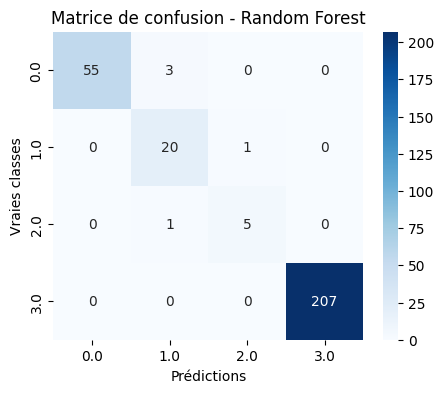

Random Forest - Accuracy: 0.9829 - F1 Score: 0.9833 - Temps d'exécution: 0.7315 sec
###################################################################

 Évaluation de Logistic Regression avec train_test_split...


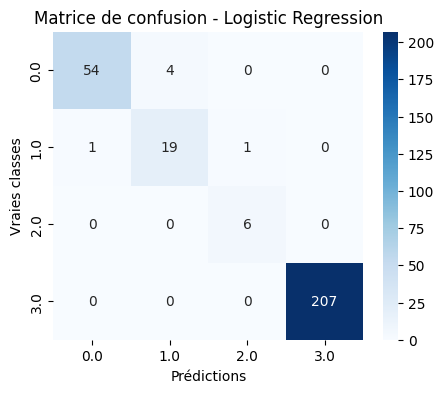

Logistic Regression - Accuracy: 0.9795 - F1 Score: 0.9798 - Temps d'exécution: 0.5065 sec
###################################################################

 Évaluation de SVC avec train_test_split...


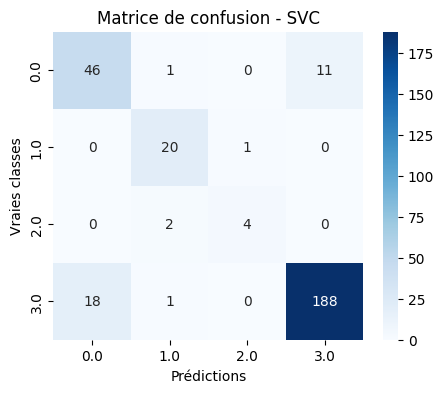

SVC - Accuracy: 0.8836 - F1 Score: 0.8852 - Temps d'exécution: 0.0783 sec
###################################################################

 Évaluation de KNN avec train_test_split...


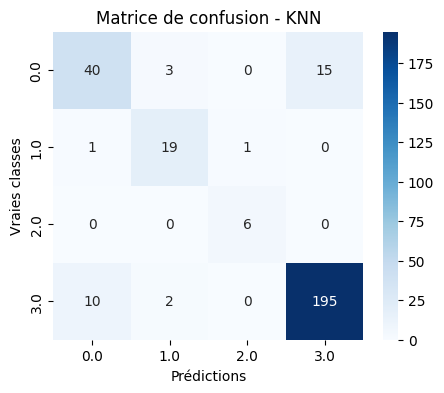

KNN - Accuracy: 0.8904 - F1 Score: 0.8885 - Temps d'exécution: 0.0497 sec
###################################################################

 Évaluation de Gradient Boosting avec train_test_split...


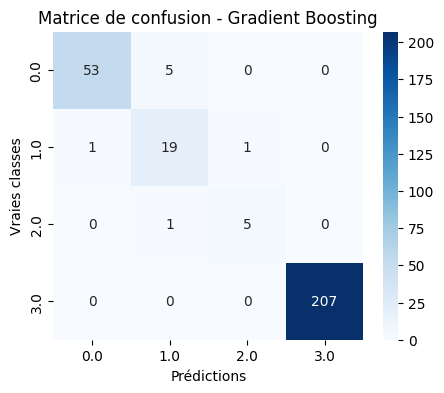

Gradient Boosting - Accuracy: 0.9726 - F1 Score: 0.9734 - Temps d'exécution: 5.4671 sec
###################################################################


In [7]:
X = Text_occ_conso_heat_tou.drop(columns=["clusters"])
y = Text_occ_conso_heat_tou["clusters"]
X = X.applymap(lambda x: float(str(x).replace(',', '.')))
X_train = X.iloc[:int((X.shape[0]*8)/10), :]
X_test = X.iloc[int((X.shape[0]*8)/10):, :]
y_train = y.iloc[:int((y.shape[0]*8)/10)]
y_test = y.iloc[int((y.shape[0]*8)/10):]
results_split = evaluate_models_split( X_train, X_test, y_train, y_test, models)


df_export = X_test.copy()
df_export['y_true'] = y_test.values  
for name, model in models.items():
    model.fit(X_train, y_train)                    
    y_pred = model.predict(X_test)                 
    df_export[f'y_pred_{name}'] = y_pred          
df_export.to_csv("../data/simulation_data/conso_kmeans_data/resultat_prediction_dataavecoccupation_perif_toulouse_dernier_20%.csv", index=False)
